<a href="https://colab.research.google.com/github/danielBejar/30-Days-Of-Python/blob/master/Version_Final_ProyectoMonitorizacionVehicular(yolov11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# INTRODUCCION

Machine Learning (ML) y Deep Learning (DL) son subcampos de la inteligencia artificial (IA) que comparten muchas similitudes, pero también tienen diferencias importantes. Aquí están las principales diferencias:

### Machine Learning (ML)
1. **Definición**: ML es una rama de la IA que permite a las máquinas aprender a partir de datos y mejorar su rendimiento en tareas específicas sin ser programadas explícitamente para ello.
2. **Técnicas**: Incluye una variedad de algoritmos como árboles de decisión, máquinas de vectores de soporte (SVM), k-medias, regresión lineal y logística, entre otros.
3. **Estructura de los Datos**: Funciona bien con conjuntos de datos estructurados y de tamaño moderado.
4. **Intervención Humana**: Requiere una mayor intervención humana para la ingeniería de características, es decir, el proceso de seleccionar y transformar variables en el conjunto de datos para mejorar la precisión del modelo.
5. **Complejidad**: Menos complejo en términos de arquitectura y requiere menos poder computacional en comparación con DL.

### Deep Learning (DL)
1. **Definición**: DL es una subcategoría de ML que utiliza redes neuronales artificiales con muchas capas (redes neuronales profundas) para modelar y resolver problemas complejos.
2. **Técnicas**: Principalmente utiliza redes neuronales, incluyendo redes neuronales convolucionales (CNN), redes neuronales recurrentes (RNN) y redes generativas adversarias (GAN).
3. **Estructura de los Datos**: Es especialmente eficaz con grandes cantidades de datos no estructurados, como imágenes, audio y texto.
4. **Intervención Humana**: Requiere menos intervención humana para la ingeniería de características porque las redes neuronales pueden aprender representaciones de características de los datos por sí mismas.
5. **Complejidad**: Más complejo en términos de arquitectura y requiere más poder computacional y recursos para entrenar modelos debido a la profundidad de las redes neuronales.

### Resumen
- **ML** se enfoca en usar algoritmos tradicionales de aprendizaje automático que generalmente requieren datos estructurados y una mayor intervención humana para la ingeniería de características.
- **DL** es una rama avanzada de ML que utiliza redes neuronales profundas, requiere menos intervención humana y es capaz de manejar y aprender de grandes volúmenes de datos no estructurados.

**Como herramienta principal para el machine learnign tenemos Scikit-learn, que son mas recomendados para datos tabulados y TensorFlow para datos no tabulados (imagenes, sonidos, texto)**

# Librerias Necesarias

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#MACHINE LEARNING

# Transformación de datos # pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
#REDES NEURONALES

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#Tensor Flow
import tensorflow as tf #pip install tensorflow==2.10.0 con CUDA 12
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# RESOLUCION DE PROBLEMAS CON IA

Clasificación unicamente? o Detección?
Es bien diferente el camino a seguir

Con eso en mente, se puede encarar cómo resolver.

Cuando se tenga bien eso, hablamos del camino que conviene transitar.

#MONITORIZACION VEHICULAR

Con el fin de obtener un sistema atomatizado para el monitoreo vehicular se opta por un sistema de deteccion de objetos basado en Yolo el cual se encargara de clasificar las imagenes o videos en 6 categorias: motos, autos, pikcups, colectivos, camiones,otros. A su vez la categoria camiones se divide en 3 categorias: camion simple, camion doble, semi remolque.
Para finalizar la clasificacion se contarán la cantidad de ejes que cuenta el vehiculo para realizar una sub clasificacion. El cual se encargara de contar los colectivos y camiones(junto con sus 3 clases internas) dependiendo de la cantidad de ejes que estos posean.
Los autos, motos, pickup y otros, no sera reclasifificados.


In [ ]:
#Instalacion de dependencias:

# Install the ultralytics package from PyPI: pip install ultralytics

# Install the ultralytics package from GitHub: pip install git+https://github.com/ultralytics/ultralytics.git@main
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
#Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ultralytics #recordar instalar antes pip install ultralytics
from ultralytics import YOLO
from IPython import display

# Limpiar la salida previa
#clear_output

# Revisar la instalación de ultralytics y configuración del entorno
ultralytics.checks()

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
#Creamos las capertas necesarias para entrenar la red

!mkdir data
!mkdir data/images
!mkdir data/images/train
!mkdir data/images/val
!mkdir data/images/test
!mkdir data/labels
!mkdir data/labels/train
!mkdir data/labels/val
!mkdir data/labels/test
!mkdir imagenes_clasificadas
!mkdir video_resultado


# IMAGENES (procesamiento de capturas)

In [ ]:

import gdown #pip install gdown

#https://drive.google.com/file/d/1LeJkw5-xZ-BOIQtVTUkeJdcEKgrNfDPw/view?usp=sharing
# ID del archivo
file_id ='1rpnN4k3JtZpJUoY-uYnAPwmwZkG-DVWJ'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Ruta donde se guardará el archivo ZIP descargado
zip_path = '/content/monitorizacion_vehicular_dataset.zip'

# Descargar el archivo
gdown.download(download_url, zip_path, quiet=False, fuzzy=True)

!unzip -qq monitorizacion_vehicular_dataset.zip



Downloading...
From (original): https://drive.google.com/uc?id=1rpnN4k3JtZpJUoY-uYnAPwmwZkG-DVWJ
From (redirected): https://drive.google.com/uc?id=1rpnN4k3JtZpJUoY-uYnAPwmwZkG-DVWJ&confirm=t&uuid=43c822a3-0cd5-4c75-ab2e-8d7803b658ab
To: /content/monitorizacion_vehicular_dataset.zip
100%|██████████| 2.86G/2.86G [00:57<00:00, 49.7MB/s]


'/content/monitorizacion_vehicular_dataset.zip'

In [ ]:
!unzip -qq monitorizacion_vehicular_dataset.zip

In [ ]:
#Se sacan solamente los archivos .png y se los ordena alfabeticamente
from tqdm.auto import tqdm
import os, fnmatch

def dirfiles(img_path,img_ext):
    img_names = fnmatch.filter(sorted(os.listdir(img_path)),img_ext)
    return img_names

In [ ]:
#Se realiza la division para entrenar y para testear
SEED = 777  #semilla
np.random.seed(SEED)

#Recomendacion tener siempre 70/30 de datos para entrenar y validar.

p_train = 0.80  # 80% del total de los datos son training
p_val   = 0.20  # 20% de los datos de training son de validación

d = dirfiles('monitorizacion_vehicular_dataset/images/','*.png')
m = len(d) # número de imagenes

print(m)

nt = round(p_train*m)
nv = round(p_val*nt)

ii = np.vstack([np.zeros((nt-nv,1)),np.ones((nv,1)),2*np.ones((m-nt,1))])
np.random.shuffle(ii) # Aleatorio


target = ['train','val','test']

for i in tqdm(range(m)):
  fname            = d[i]
  tname            = fname[:-3]+'txt'
  ti               = target[int(ii[i])]
  source_file      = 'monitorizacion_vehicular_dataset/images/'+fname
  destination_file = '/content/data/images/'+ti
  os.system('cp ' + source_file + ' ' + destination_file)
  source_file      = 'monitorizacion_vehicular_dataset/labels/'+tname
  destination_file = 'data/labels/'+ti
  os.system('cp ' + source_file + ' ' + destination_file)

print('Training: ', nt-nv)
print('     Val: ', nv)
print(' Testing: ',m-nt)


1070


  0%|          | 0/1070 [00:00<?, ?it/s]

<ipython-input-11-374bc10c2111>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ti               = target[int(ii[i])]


Training:  685
     Val:  171
 Testing:  214


In [ ]:
print(len(dirfiles('/content/data/images/train','*.png'))) # número de imagenes


685


Entrenamiento (Train): Este es el conjunto de datos que el modelo utiliza para aprender. Durante el proceso de entrenamiento, el modelo ajusta sus parámetros para minimizar la función de pérdida en estos datos.

Validación (Val): Este conjunto se utiliza para ajustar los hiperparámetros del modelo y para prevenir el sobreajuste (overfitting). A diferencia del conjunto de entrenamiento, el modelo no ve estos datos durante el entrenamiento, pero sí los utiliza para evaluar el rendimiento durante el entrenamiento.

Test (Prueba): El conjunto de prueba se utiliza para evaluar el rendimiento final del modelo una vez que el entrenamiento y la validación están completos. No se utiliza en absoluto durante el entrenamiento o la validación. Su propósito es proporcionar una medida objetiva de cómo el modelo generaliza a datos que nunca ha visto antes.

In [ ]:
# Archivo YAML para YOLOv11

yaml_content = """
name: vehiculos_dataset
nc: 8  # Número de clases
names: ['moto', 'auto', 'pickup', 'colectivo', 'camion_simple', 'camion_doble', 'semi_remolque', 'otro']  # Nombres de las clases

train: /content/data/images/train  # Ruta a las imágenes de entrenamiento
val: /content/data/images/val  # Ruta a las imágenes de validación
test: /content/data/images/test  # Ruta a las imágenes de prueba

train_labels: /content/data/labels/train  # Etiquetas de entrenamiento
val_labels: /content/data/labels/val  # Etiquetas de validación
test_labels: /content/data/labels/test  # Etiquetas de prueba
"""

# Crea y guarda el archivo YAML
with open("/content/data/vehiculos_dataset_yoloV11.yaml", "w") as file:
    file.write(yaml_content)

In [ ]:
#Entrenamos nuestro modelo en YOLOv11
from ultralytics import YOLO

model = YOLO("yolo11l.pt") # Esto carga la configuración del modelo

#model.train(data='/content/vehiculos_dataset.yaml', epochs=70, val=True, plots=True, lr0=0.06, lrf=0.01)  # train the model
model.train(data='/content/data/vehiculos_dataset_yoloV11.yaml', epochs=80, val=True, plots=True)  # train the model

#Anotaciones  extras
#epochs: epocas
#plots: habilita los graficos al finalizar el entrenamiento
#val: habilita la validacion durante el entrenamiento
#lr0: tazas de aprendizaje inicial
#lrf: taza de aprendizaje final
#momentum: define que porcentaje de los pasos anteiores se usan para los pasos de la epoca actual.

100%|██████████| 49.0M/49.0M [00:00<00:00, 247MB/s]


Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=/content/data/vehiculos_dataset_yoloV11.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/data/labels/train... 774 images, 0 backgrounds, 0 corrupt: 100%|██████████| 774/774 [00:10<00:00, 74.43it/s] 

train: New cache created: /content/data/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/labels/val... 225 images, 0 backgrounds, 0 corrupt: 100%|██████████| 225/225 [00:03<00:00, 58.05it/s]

val: New cache created: /content/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      10.4G     0.6014       1.99      0.903         16        640: 100%|██████████| 49/49 [00:55<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

                   all        225        334      0.739      0.508      0.584      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      10.8G     0.6694      1.287     0.9419         21        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


                   all        225        334      0.509      0.602       0.48      0.357

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80        11G     0.7158      1.133     0.9563         19        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

                   all        225        334      0.644      0.581       0.55      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      11.1G     0.6962      1.159     0.9402         20        640: 100%|██████████| 49/49 [00:50<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]


                   all        225        334      0.471      0.634       0.45      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      11.2G     0.6655      0.997     0.9492         18        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        225        334      0.686       0.43      0.467       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      11.2G     0.6443     0.8942      0.932         11        640: 100%|██████████| 49/49 [00:54<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]


                   all        225        334      0.715      0.539       0.58      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      11.4G     0.6373      0.917     0.9331         12        640: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]


                   all        225        334      0.588      0.538      0.555      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      11.5G     0.6272     0.8849     0.9371         22        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        225        334      0.614      0.676      0.606      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      11.5G     0.6442     0.8638     0.9545         18        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        225        334      0.864      0.596      0.671      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      11.6G      0.598     0.7828     0.9212         20        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.695      0.615      0.633      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      11.7G     0.5797     0.8121     0.9124         22        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.925      0.497      0.679      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      11.8G     0.5732     0.7692     0.9157         21        640: 100%|██████████| 49/49 [00:51<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        225        334      0.674      0.591      0.681      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      11.9G     0.5545      0.691     0.9056         14        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]

                   all        225        334      0.873      0.609      0.715      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80        12G     0.5467     0.7342     0.9075         13        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]

                   all        225        334      0.646      0.729        0.7      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      12.1G     0.5686     0.6806      0.912         10        640: 100%|██████████| 49/49 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]

                   all        225        334      0.566      0.792      0.741      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      12.2G     0.5447     0.6864     0.8992         15        640: 100%|██████████| 49/49 [00:51<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

                   all        225        334      0.803      0.671      0.755      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      12.3G     0.5522     0.7254      0.909         22        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]

                   all        225        334      0.898      0.619      0.756      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      12.4G      0.534     0.6493     0.9061         13        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]

                   all        225        334      0.702      0.785      0.784      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      12.6G     0.5281     0.6546     0.8889         20        640: 100%|██████████| 49/49 [00:50<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        225        334      0.671      0.786      0.784      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      12.7G     0.5164     0.6215     0.8942         25        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.783      0.788      0.799        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      12.9G     0.5132     0.5905     0.8853         22        640: 100%|██████████| 49/49 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]

                   all        225        334      0.694      0.759      0.788      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80        13G     0.5124     0.5992      0.898         14        640: 100%|██████████| 49/49 [00:55<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

                   all        225        334      0.815      0.745      0.806      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      13.2G     0.5033     0.6088     0.8893         25        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]

                   all        225        334       0.67      0.792      0.691      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      13.3G     0.4915     0.5847     0.8823         15        640: 100%|██████████| 49/49 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

                   all        225        334      0.769      0.771      0.803      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      10.8G     0.4742     0.5541     0.8749         23        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]

                   all        225        334      0.874      0.657      0.767      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      11.2G      0.503     0.6046     0.8822         23        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

                   all        225        334      0.762      0.744      0.769      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      11.2G     0.4864     0.5486     0.8782         20        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.808      0.788       0.84      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      11.2G     0.4851     0.5503     0.8888         11        640: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]

                   all        225        334      0.774      0.708       0.79      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      11.2G     0.4819     0.5643     0.8775         13        640: 100%|██████████| 49/49 [00:50<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        225        334      0.837      0.728      0.796      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      11.2G     0.4701     0.5468     0.8704         18        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.11it/s]

                   all        225        334      0.845      0.733      0.859       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      11.3G     0.4656     0.5066     0.8735         15        640: 100%|██████████| 49/49 [00:52<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        225        334      0.854      0.774       0.85      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      11.4G     0.4455     0.4806     0.8625         17        640: 100%|██████████| 49/49 [00:50<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        225        334      0.848      0.753      0.835      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      11.5G     0.4432     0.4879     0.8617         14        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        225        334      0.772        0.8      0.805      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      11.5G     0.4437     0.4866     0.8606         23        640: 100%|██████████| 49/49 [00:50<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        225        334      0.763      0.768      0.811      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      11.7G     0.4587       0.51     0.8714         16        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


                   all        225        334      0.842      0.772      0.825      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      11.8G     0.4372     0.4916     0.8611         19        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        225        334       0.79      0.752      0.833      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      11.9G     0.4456     0.4888     0.8613         15        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all        225        334      0.847      0.767      0.819       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      11.9G     0.4388     0.4726     0.8591         19        640: 100%|██████████| 49/49 [00:52<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        225        334      0.768        0.8      0.822      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80        12G     0.4364     0.4511     0.8568         14        640: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all        225        334      0.812      0.808      0.832      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      12.1G     0.4503     0.4657     0.8619         23        640: 100%|██████████| 49/49 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.892      0.708      0.828      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      12.2G     0.4251     0.4362     0.8529         20        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        225        334      0.868      0.821      0.886      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      12.3G     0.4188     0.4381     0.8502         11        640: 100%|██████████| 49/49 [00:51<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all        225        334      0.754       0.89      0.879      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      12.4G     0.4168     0.4391     0.8506         14        640: 100%|██████████| 49/49 [00:54<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]

                   all        225        334      0.885      0.752      0.871      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      12.5G     0.4348       0.45     0.8585         24        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        225        334      0.867      0.795      0.889      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      12.6G     0.4281     0.4333     0.8613         18        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334       0.83      0.817      0.861      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      12.7G     0.4126     0.4111     0.8518         16        640: 100%|██████████| 49/49 [00:54<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.816      0.842      0.848      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      12.9G     0.4189     0.4214     0.8547         16        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        225        334      0.796      0.813      0.838      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80        13G     0.4158     0.4201     0.8556         23        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        225        334        0.9       0.82      0.871      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      13.2G     0.4288     0.4177     0.8531         23        640: 100%|██████████| 49/49 [00:54<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]

                   all        225        334       0.84      0.844      0.858      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      13.3G     0.4053     0.4175     0.8533         16        640: 100%|██████████| 49/49 [00:51<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        225        334      0.816      0.835      0.878      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      10.8G     0.4055     0.4079     0.8486         14        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        225        334      0.879      0.811      0.866      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      11.2G     0.3927     0.3842     0.8439          9        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]

                   all        225        334      0.841       0.82      0.871      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      11.2G     0.3842     0.3759     0.8381         18        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]

                   all        225        334      0.848       0.84      0.869      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      11.2G     0.3945     0.3842     0.8499         14        640: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]

                   all        225        334      0.904      0.821       0.88       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      11.2G     0.3964     0.3792     0.8491         14        640: 100%|██████████| 49/49 [00:51<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]

                   all        225        334      0.869      0.833      0.856      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      11.2G     0.3834     0.3723     0.8373         18        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]

                   all        225        334      0.889      0.823       0.88      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      11.3G     0.3749     0.3527     0.8374         11        640: 100%|██████████| 49/49 [00:52<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]

                   all        225        334      0.901      0.851      0.884      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      11.4G     0.3887     0.3676     0.8479         14        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

                   all        225        334      0.838      0.901      0.899      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      11.5G     0.3819     0.3556     0.8392         17        640: 100%|██████████| 49/49 [00:51<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]


                   all        225        334      0.932      0.848      0.909      0.853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      11.6G     0.3725     0.3462      0.837         13        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]

                   all        225        334      0.929      0.828      0.895      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      11.7G       0.39     0.3373     0.8438         25        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        225        334      0.881      0.862      0.891       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      11.7G     0.3661      0.354     0.8346         16        640: 100%|██████████| 49/49 [00:56<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]

                   all        225        334      0.836      0.866      0.887      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      11.9G     0.3626     0.3327     0.8335         20        640: 100%|██████████| 49/49 [00:53<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]

                   all        225        334      0.881      0.845      0.893      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80        12G     0.3692     0.3536     0.8397         17        640: 100%|██████████| 49/49 [00:52<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]

                   all        225        334      0.892      0.836      0.904      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      12.1G     0.3653     0.3395     0.8366         23        640: 100%|██████████| 49/49 [00:52<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]

                   all        225        334      0.911      0.857      0.906      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      12.1G     0.3696     0.3345     0.8338         13        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


                   all        225        334      0.904      0.823      0.904      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      12.3G     0.3594     0.3102     0.8363         13        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]

                   all        225        334      0.916      0.874      0.932      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      12.4G     0.3583      0.312     0.8419         13        640: 100%|██████████| 49/49 [00:51<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        225        334      0.882      0.838      0.896      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      12.5G     0.3546     0.3183      0.836         20        640: 100%|██████████| 49/49 [00:52<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]

                   all        225        334      0.922      0.796      0.911      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      12.5G     0.3481     0.3104     0.8302         20        640: 100%|██████████| 49/49 [00:53<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]

                   all        225        334      0.843      0.893      0.892      0.843


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      12.6G     0.3014     0.2588     0.7969          8        640: 100%|██████████| 49/49 [00:58<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]

                   all        225        334      0.906       0.85      0.894      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      12.8G     0.3063     0.2439     0.7934          8        640: 100%|██████████| 49/49 [00:52<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]

                   all        225        334       0.93      0.825      0.913      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      12.9G     0.2956     0.2335      0.798          8        640: 100%|██████████| 49/49 [00:51<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]

                   all        225        334      0.905      0.846      0.915      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80        13G     0.3063     0.2277     0.7943          8        640: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]

                   all        225        334      0.896      0.906      0.928      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      13.2G        0.3     0.2313     0.7996         11        640: 100%|██████████| 49/49 [00:51<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        225        334      0.935      0.846      0.931      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      13.3G     0.2918     0.2251     0.7974          7        640: 100%|██████████| 49/49 [00:50<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]

                   all        225        334      0.903      0.873      0.921      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      10.8G     0.2878     0.2153     0.7988          7        640: 100%|██████████| 49/49 [00:52<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]

                   all        225        334      0.929      0.853       0.91      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      11.2G     0.2881     0.2212     0.7968          8        640: 100%|██████████| 49/49 [00:53<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

                   all        225        334      0.925      0.851      0.913      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      11.2G      0.292     0.2152     0.7964          9        640: 100%|██████████| 49/49 [00:51<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]

                   all        225        334      0.913      0.845      0.912      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      11.2G     0.2741     0.2095     0.7886          7        640: 100%|██████████| 49/49 [00:54<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]

                   all        225        334      0.918      0.844      0.922      0.877



80 epochs completed in 1.487 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 51.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 51.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.98 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l summary (fused): 190 layers, 25,285,480 parameters, 0 gradients, 86.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]


                   all        225        334      0.935      0.846      0.931      0.885
                  moto         13         13          1      0.932      0.995      0.917
                  auto         83        103       0.98      0.928      0.986      0.949
                pickup        106        115      0.962      0.922      0.979      0.939
             colectivo         12         13          1      0.783      0.922      0.881
         camion_simple         47         49       0.94      0.963      0.988      0.944
          camion_doble          7          8      0.648       0.75      0.784      0.761
         semi_remolque         25         25      0.954      0.822      0.945       0.92
                  otro          8          8          1      0.667      0.849      0.771
Speed: 0.1ms preprocess, 9.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad629ae58d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [ ]:
import shutil
# Comprimir la carpeta 'runs' en un archivo zip
shutil.make_archive('/content/runs', 'zip', '/content', 'runs')


'/content/runs.zip'

In [ ]:
#Guardar el modelo entrenado (por defecto el modelo se guarda en la carpeta /content/runs/detect/train5/weights/best.pt)

#model.save('/content/modelo_terminado.pt')

El archivo best.pt se guarda basado en la pérdida de validación (val/box_loss, val/cls_loss, etc.), ya que esta pérdida refleja el desempeño general del modelo en el conjunto de validación. La pérdida de validación generalmente incluye la pérdida de clasificación (cls_loss), por lo que el modelo que tiene la menor pérdida de validación se guarda como best.pt.

In [ ]:
# Después de entrenar el modelo hay que cargarlo para usarlo

# Carga el modelo preentrenado o personalizado
#model = YOLO('yolo11l-cls.pt')

#Si queremos cargar nuestro modelo
model = YOLO('best.pt')

#model = YOLO('/content/runs/detect/train/weights/best.pt')




image 1/1 /content/monitorizacion_vehicular_dataset/images/vlcsnap-2024-08-01-13h16m07s608.png: 384x640 1 pickup, 1 otro, 113.6ms
Speed: 15.4ms preprocess, 113.6ms inference, 419.6ms postprocess per image at shape (1, 3, 384, 640)


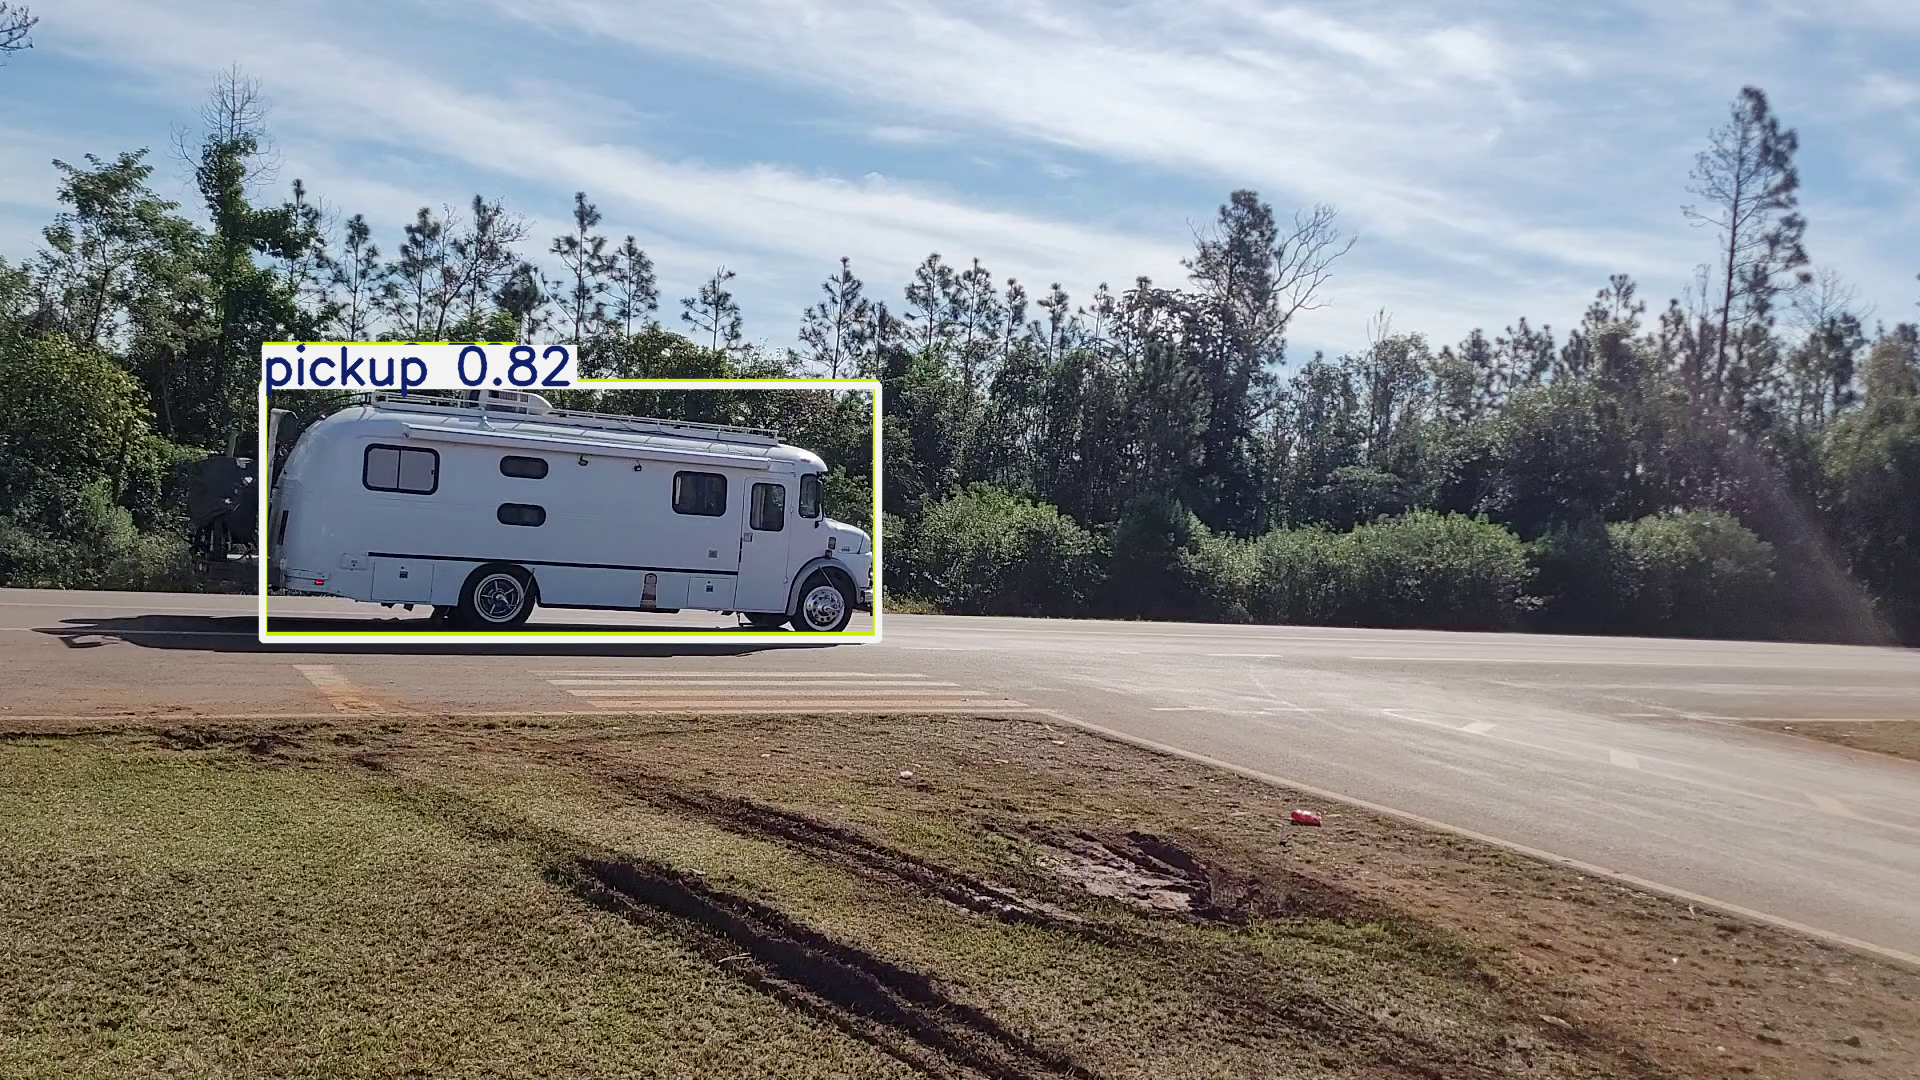

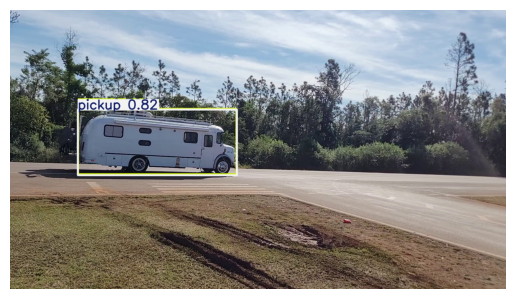

In [ ]:
from PIL import Image #Para ver la imagen clasificadad
import matplotlib.pyplot as plt

# Realizar predicciones en una nueva imagen
image_path = '/content/monitorizacion_vehicular_dataset/images/vlcsnap-2024-08-01-13h16m07s608.png'  # Ruta a la imagen que quieres probar
results = model(image_path)


# Asegúrate de trabajar con el primer elemento de la lista de resultados
result = results[0]
# Mostrar los resultados visualmente
result.show()

# Guardar la imagen con las detecciones
result.save('/content/result_image.jpg')

# Mostrar la imagen guardada

image = Image.open('/content/result_image.jpg')
plt.imshow(image)
plt.axis('off')  # Opcional, para no mostrar los ejes
plt.show()


In [ ]:
##Creamos la carpeta para cada clase

import os
from ultralytics import YOLO

# Ruta a la carpeta que contiene las imágenes
images_folder = '/content/monitorizacion_vehicular_dataset/images'# Ruta a la carpeta de salida para guardar los resultados
output_folder = '/content/imagenes_clasificadas'
os.makedirs(output_folder, exist_ok=True)

# Cargar el modelo entrenado
#model = YOLO('/content/runs/detect/train/weights/best.pt')
model = YOLO('/content/best.pt')

# Obtener los nombres de las clases
class_names = model.names
print(class_names)

# Crear carpetas para cada clase
class_folders = {}
for class_id, class_name in class_names.items():
    # Crear la carpeta para cada clase
    class_folder = os.path.join(output_folder, class_name)
    os.makedirs(class_folder, exist_ok=True)
    class_folders[class_id] = class_folder

class_folder = os.path.join(output_folder, 'incertezas')
os.makedirs(class_folder, exist_ok=True)

{0: 'moto', 1: 'auto', 2: 'pickup', 3: 'colectivo', 4: 'camion_simple', 5: 'camion_doble', 6: 'semi_remolque', 7: 'otro'}


In [ ]:


# Ruta a la carpeta que contiene las imágenes
images_folder = '/content/monitorizacion_vehicular_dataset/images'# Ruta a la carpeta de salida para guardar los resultados
output_folder = '/content/imagenes_clasificadas'# Cargar el modelo entrenado

cont=1
# Obtener los nombres de las clases
class_names = model.names

# Iterar sobre todas las imágenes en la carpeta
for image_file in os.listdir(images_folder):

    # Realizar inferencia en la imagen
    image_path = os.path.join(images_folder, image_file)
    results = model(image_path,conf=0.8,iou=0.6) #iou: umbral de Non-Maximum Suppression (NMS)
    print("Imagen N°:",cont)
    cont +=1
    # Iterar sobre las detecciones en la imagen
    for result in results:
        boxes = result.boxes

        for box in boxes:
            # Obtener la clase predicha
            class_id = int(box.cls[0])
            class_name = class_names[class_id]

            # Crear la ruta para guardar la imagen en la carpeta correspondiente
            class_folder = os.path.join(output_folder, class_name)
            print(class_name)

            # Guardar la imagen en la carpeta de la clase correspondiente
            if box.conf < 0.8:  # Umbral de confianza del 80%
                  result_image_path = os.path.join('/content/imagenes_clasificadas/incertezas', image_file)
                  result.save(result_image_path)
            else:
                  result_image_path = os.path.join(class_folder, f"{os.path.splitext(image_file)[0]}_{class_name}.jpg")
                  result.save(result_image_path)



Se truncaron las últimas líneas 5000 del resultado de transmisión.

image 1/1 /content/monitorizacion_vehicular_dataset/images/vlcsnap-2024-07-31-10h20m38s247.png: 384x640 1 auto, 30.9ms
Speed: 2.7ms preprocess, 30.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Imagen N°: 163
auto

image 1/1 /content/monitorizacion_vehicular_dataset/images/vlcsnap-2024-08-05-22h03m20s769.png: 384x640 1 pickup, 30.9ms
Speed: 2.2ms preprocess, 30.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Imagen N°: 164
pickup

image 1/1 /content/monitorizacion_vehicular_dataset/images/vlcsnap-2024-07-31-10h07m51s823.png: 384x640 1 pickup, 30.9ms
Speed: 2.2ms preprocess, 30.9ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Imagen N°: 165
pickup

image 1/1 /content/monitorizacion_vehicular_dataset/images/vlcsnap-2024-08-02-11h03m55s396.png: 384x640 1 camion_simple, 30.9ms
Speed: 2.4ms preprocess, 30.9ms inference, 1.3ms postprocess per image at shape (1, 3

In [ ]:
import shutil

# Comprimir la carpeta de resultados
shutil.make_archive('/content/imagenes_clasificadas', 'zip', '/content','imagenes_clasificadas')




'/content/imagenes_clasificadas.zip'

# VIDEO (procesamiento de grabaciones)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import gdown #pip install gdown

#https://drive.google.com/file/d/1Pz0qm8_HA1pEoEiJEKGPYahkk9VX8nfa/view?usp=sharing

# ID del archivo de Google Drive
file_id = '1Pz0qm8_HA1pEoEiJEKGPYahkk9VX8nfa'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Ruta donde se guardará el archivo ZIP descargado
zip_path = '/content/video.zip'


# Descargar el archivo
gdown.download(download_url, zip_path, quiet=False, fuzzy=True)

!unzip -o /content/video.zip -d /content/

Downloading...
From (original): https://drive.google.com/uc?id=1Pz0qm8_HA1pEoEiJEKGPYahkk9VX8nfa
From (redirected): https://drive.google.com/uc?id=1Pz0qm8_HA1pEoEiJEKGPYahkk9VX8nfa&confirm=t&uuid=6b5a25a1-775e-4d30-aca3-2ce5e4f3138a
To: /content/video.zip
100%|██████████| 423M/423M [00:05<00:00, 72.7MB/s]


Archive:  /content/video.zip
   creating: /content/video/
  inflating: /content/video/videovehiculos.mp4  


In [ ]:
!mkdir video_resultado

Si pones iou=0.5, serás más estricto con las superposiciones, eliminando más cajas, lo que reduce el número de detecciones redundantes pero también puede eliminar algunas detecciones válidas.
Si bajas iou=0.3, serás más permisivo, permitiendo más superposiciones y reteniendo más cajas, pero esto podría aumentar el número de falsos positivos.

In [ ]:
import cv2
from PIL import Image
from ultralytics import YOLO
import os
from tqdm.notebook import tqdm  # Barra de progreso optimizada para notebooks


#Si queremos cargar nuestro modelo
model = YOLO('/content/best.pt')

# Ruta al video que quieres procesar
video_path = '/content/video/videovehiculos.mp4'
output_path = '/content/video_resultado/video_clasificacion.mp4'


# Abrir el video
cap = cv2.VideoCapture(video_path)

# Obtener detalles del video
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Crear un objeto VideoWriter para guardar el video procesado
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec para guardar en formato MP4
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))


with tqdm(total=total_frames, desc="Procesando video", unit="frame") as pbar:
  while cap.isOpened():
      ret, frame = cap.read()
      if not ret:
          break

      # Convertir el frame a formato PIL para pasarlo al modelo
      frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      image = Image.fromarray(frame_rgb)

      # Realizar predicciones en el frame
      #results = model(pil_image)
      results = model(image, iou=0.6)

      # Obtener la imagen con las detecciones
      result_frame = results[0].plot()

      # Convertir de vuelta a formato BGR para guardar con OpenCV
      #result_frame_bgr = cv2.cvtColor(result_frame, cv2.COLOR_RGB2BGR)
      #out.write(result_frame_bgr) #Guarda en formato BGR

      # Escribir el frame procesado en el video de salida
      out.write(result_frame)

    # Actualizar la barra de progreso
      pbar.update(1)


# Liberar los objetos
cap.release()
out.release()
progress_bar.close()



Procesando video:   0%|          | 0/2604 [00:00<?, ?frame/s]

Se truncaron las últimas líneas 5000 del resultado de transmisión.
0: 384x640 (no detections), 32.0ms
Speed: 3.9ms preprocess, 32.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 40.7ms
Speed: 3.6ms preprocess, 40.7ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 35.1ms
Speed: 3.4ms preprocess, 35.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 34.8ms
Speed: 3.4ms preprocess, 34.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 2.3ms preprocess, 30.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 2.3ms preprocess, 30.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 30.9ms
Speed: 2.6ms preprocess, 30.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: